In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from TAPE.deconvolution import ScadenDeconvolution, Deconvolution
from TAPE.model import AutoEncoder

In [4]:
model = AutoEncoder(10000,20)

In [5]:
type(model)

TAPE.model.AutoEncoder

In [2]:
expr = pd.read_csv('../ROSMAP_lengthScaledTPM_counts.txt',sep='\t',index_col=0)

Reading single-cell dataset, this may take 1 min
Reading dataset is done
Generating random cell fractions for each pseudo-bulk sample
Generating cell frations is done
Sampling cells to compose pseudo-bulk data


5000it [00:27, 182.20it/s]


Sampling is done
Reading training data
Reading is done
Reading test data
Reading test data is done
Using counts data to train model
Variance Cutoff
Find intersected genes
Intersected gene number is  11417
Log2 & MinMax scale
training data shape is  (5000, 11417) 
test data shape is  (639, 11417)
Start training


100%|██████████| 128/128 [00:42<00:00,  3.00it/s]

Training is done
prediction loss is:


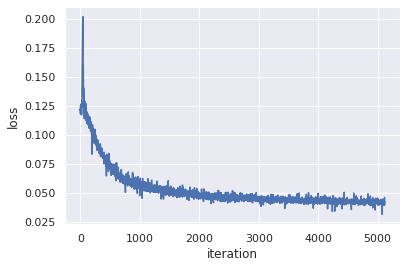

reconstruction loss is:


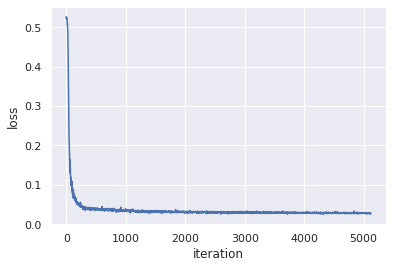

Notice that you are using parameters: mode=overall and adaptive=False
Model is saved without defined name
Predict cell fractions without adaptive training
Prediction is done


In [3]:
_, tape_pred = Deconvolution('../ref/humanbrain_ref.txt', expr.T,adaptive=False)

In [4]:
scaden_pred = ScadenDeconvolution('../ref/humanbrain_ref.txt', expr.T)

Reading single-cell dataset, this may take 1 min
Reading dataset is done
Generating random cell fractions for each pseudo-bulk sample
Generating cell frations is done
Sampling cells to compose pseudo-bulk data


5000it [00:25, 194.24it/s]


Sampling is done
Reading training data
Reading is done
Reading test data
Reading test data is done
Using counts data to train model
Variance Cutoff
Find intersected genes
Intersected gene number is  11417
Log2 & MinMax scale
training data shape is  (5000, 11417) 
test data shape is  (639, 11417)
train model256 now


100%|██████████| 128/128 [00:33<00:00,  3.78it/s]


train model512 now


100%|██████████| 128/128 [00:35<00:00,  3.59it/s]


train model1024 now


100%|██████████| 128/128 [00:39<00:00,  3.23it/s]

Training of Scaden is done


In [8]:
scaden_pred.to_csv('ROSMAPpred_scaden.csv')

In [9]:
tape_pred.to_csv('ROSMAPpred_tape.csv')